### Step :- 0 Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [3]:
train_dir      = 'Data/Cat_and_Dog/train/'
test_dir       = 'Data/Cat_and_Dog/test/'

### Hidden code

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example of setting up ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale images to [0,1]
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Data/Cat_and_Dog/train/',  # Provide path to your training dataset
    target_size=(256, 256),  # Resize all images to 256x256
    batch_size=32,  # Choose an appropriate batch size
    class_mode='binary'  # Binary classification mode (for two classes)
)

validation_generator = validation_datagen.flow_from_directory(
    'Data/Cat_and_Dog/validation/',  # Provide path to your validation dataset
    target_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Batch size
    class_mode='binary'  # Binary classification
)

# Now, you can train the model
history = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=validation_generator
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


NameError: name 'model' is not defined

### Step :- 1 Data Preprocessing
- Read the Image files
- Decode the JPEG content to RGB grids of pixels.
- Convert thses into floating point tensors
- Rescale the pixel values (between 0 and 255) to the [0,1] interval
- Link : https://keras.io/preprocessing/image/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Generators

train_generator = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_generator = keras.utils.image_dataset_from_directory(
    directory = test_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size=(256,256)
)

Found 2000 files belonging to 2 classes.
Found 850 files belonging to 2 classes.


In [7]:
# Normalized

def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

    train_generator      = train_generator.map(process)
    validation_generator = validation_generator.map(process)

In [8]:
# Model Buliding 

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.5367 - loss: 49.1360 - val_accuracy: 0.5282 - val_loss: 0.6895
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.6399 - loss: 0.6255 - val_accuracy: 0.5706 - val_loss: 0.6877
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.6628 - loss: 0.5818 - val_accuracy: 0.5847 - val_loss: 0.7173
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.7345 - loss: 0.4992 - val_accuracy: 0.5859 - val_loss: 0.9153
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8263 - loss: 0.3688 - val_accuracy: 0.5859 - val_loss: 1.2498
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.8729 - loss: 0.2781 - val_accuracy: 0.5906 - val_loss: 1.3936
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.9167 - loss: 0.1919 - val_accuracy: 0.5941 - val_loss: 1.6639
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9613 - loss: 0.0946 - val_accuracy: 0.5871 - 

In [22]:
model.save('model.h5')

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


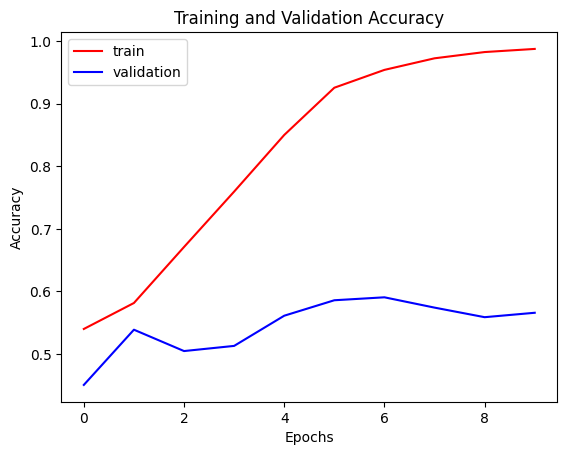

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()